<a href="https://colab.research.google.com/github/rioAgustian/Numerical-Analysis/blob/main/diferensiasi_numerik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Turunan Numerik Orde-1**

**Rio Agustian Gilang Fernando, Fisika**

**Fakultas Matematika dan Ilmu Pengetahuan Alam**

**Universitas Negeri Semarang**


## **0. Tentang**

Kode ini ditulis guna menyelesaikan permasalahan turunan numerik (*numerical differentiation*). Terdapat tiga metode yang dibahas di sini, yaitu:


1.   Hampiran selisih-maju (*forward difference approximation*)
2.   Hampiran selisih-mundur (*backward difference approximation*)
3.   Hampiran selisih tengah (*centered difference approximation*)

Kode ini juga membahas mengenai perbedaan galat masing-masing metode.

## **1. Hampiran Selisih-maju (*Forward Difference Approximation*)**

Algoritma metode hampiran selisih-maju adalah sebagai berikut.

\begin{align}
f'(x_i) ≈ \frac{f(x_i + h)- f(x_i)}{h}
\end{align}

Dengan $h$ adalah *step-size.*

In [132]:
import numpy as np
import matplotlib.pyplot as plt

In [133]:
def f(x):
  """
  ini adalah fungsi yang akan dicari turunannya.
  """
  y = -0.1*x**4 - 0.15*x**3 - 0.5*x**2 - 0.25*x + 1.2
  return y

def df(x):
  """
  ini adalah fungsi yang merupakan turunan analitik dari 
  fungsi f(x).
  """
  y = -0.4*x**3 - 0.45*x**2 - x - 0.25
  return y

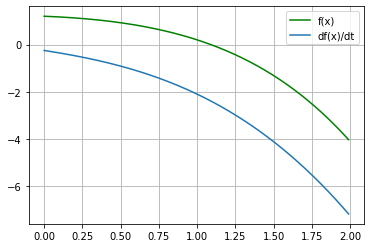

In [134]:
# metode analitik
x  = np.arange(0, 2, 0.01)
y  = f(x)   # fungsi f(x)
y0 = df(x)  # fungsi df(x)/dx

plt.plot(x, y, color="green", label="f(x)")
plt.plot(x, y0, label="df(x)/dt")

plt.legend()
plt.grid()
plt.show()

In [135]:
h = 0.1
x = 0.5
dydx = (f(x + h) - f(x))/h
dydx 

-1.003599999999999

In [136]:
# metode selisih-maju
h = 0.1                   # step-size
x = np.arange(0, 1+h, h)  # domain
y0 = df (x)               # turunan analitik
y1 = (f(x + h) - f(x))/h  # turunan numerik (forward diff)

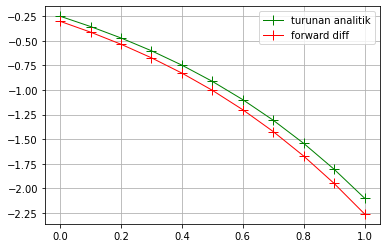

In [137]:
# visualisasi data
plt.plot(x, y0, color="green", marker="+", 
         markersize=10, lw=1, label="turunan analitik")
plt.plot(x, y1, color="red", marker="+", 
         markersize=10, lw=1, label="forward diff")

plt.legend()
plt.grid()
plt.show()

## **2. Hampiran Selisih-mundur (*Backward Difference Approximation*)**

Algoritma metode hampiran selisih-mundur adalah sebagai berikut.

\begin{align}
f'(x_i) ≈ \frac{f(x_i)- f(x_i-h)}{h}
\end{align}

Dengan $h$ adalah *step-size.*

In [138]:
h = 0.1
x = 0.5
dydx = (f(x) - f(x-h))/h
dydx 

-0.8283999999999991

In [139]:
# metode selisih-mundur
h = 0.1                   # step-size
x = np.arange(0, 1+h, h)   # domain
y0 = df(x)                # turunan analitik
y2 = (f(x) - f(x-h))/h    # turunan numerik (backward diff)

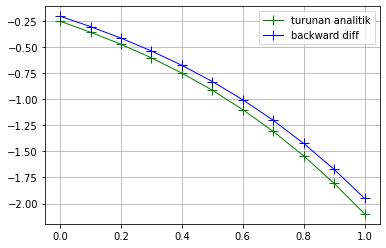

In [140]:
# visualisasi data
plt.plot(x, y0, color="green", marker="+", 
         markersize=10, lw=1, label="turunan analitik")
plt.plot(x, y2, color="blue", marker="+",
         markersize=10, lw=1, label="backward diff")

plt.legend()
plt.grid()
plt.show()

## **3. Hampiran Selisih-tengah (*Centered Difference Approximation*)**

Algoritma metode hampiran selisih-tengah adalah sebagai berikut.

\begin{align}
f'(x_i) ≈ \frac{f(x_i+h)- f(x_i-h)}{2h}
\end{align}

Dengan $h$ adalah *step-size.*

In [141]:
h = 0.1
x = 0.5
dydx = (f(x+h)-f(x-h))/(2*h)
dydx 

-0.915999999999999

In [142]:
# metode selisih-tengah
h = 0.1                     # step-size
x = np.arange(0, 1+h, h)    # domain
y0 = df(x)                  # turunan analitik
y3 = (f(x+h)-f(x-h))/(2*h)  # turunan numerik (centered diff)

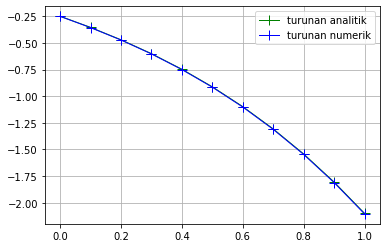

In [143]:
# visualisasi data
plt.plot(x, y0, color="green", marker="+", 
         markersize=10, lw=1, label="turunan analitik")
plt.plot(x, y3, color="blue", marker="+", 
         markersize=10, lw=1, label="turunan numerik")

plt.legend()
plt.grid()
plt.show()

## **4. Perbandingan Metode Forward, Backward, dan Centered Difference**

Pada bagian ini, galat antara ketiga metode yang dipaparkan sebelumnya dibandingkan. Masalah yang ditinjau masih sama dengan bagian 1 sampai 3.

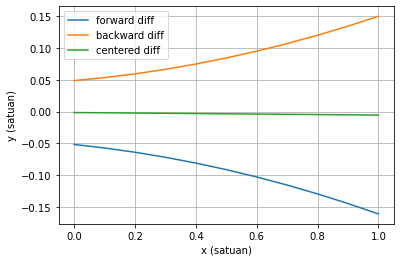

In [144]:
# galat mutlak
err1 = y1 - y0   # forward diff
err2 = y2 - y0   # backward diff
err3 = y3 - y0   # centered diff

plt.plot(x, err1, label="forward diff")
plt.plot(x, err2, label="backward diff")
plt.plot(x, err3, label="centered diff")
plt.xlabel("x (satuan)")
plt.ylabel("y (satuan)")

plt.legend()
plt.grid()
plt.show()

## **5. Contoh**

Carilah turunan pertama dari $f(x)=e^{-x}\text{sin}(2x)$

In [145]:
def g(x):
  """
  ini adalah fungsi yang ingin dicari turunannya
  """
  y = np.exp(-x) * np.sin(2*x) + 1
  return y

# nilai analitik
import sympy as sp

x = sp.symbols("x")
expr = sp.exp(-x) * sp.sin(2*x) + 1
expr_diff = sp.diff(expr, x)
expr_diff

-exp(-x)*sin(2*x) + 2*exp(-x)*cos(2*x)

In [146]:
# ini turunan analitiknya 
f_diff = sp.lambdify((x), expr_diff)

step-size = 0.05
x min = 0
x max = 1


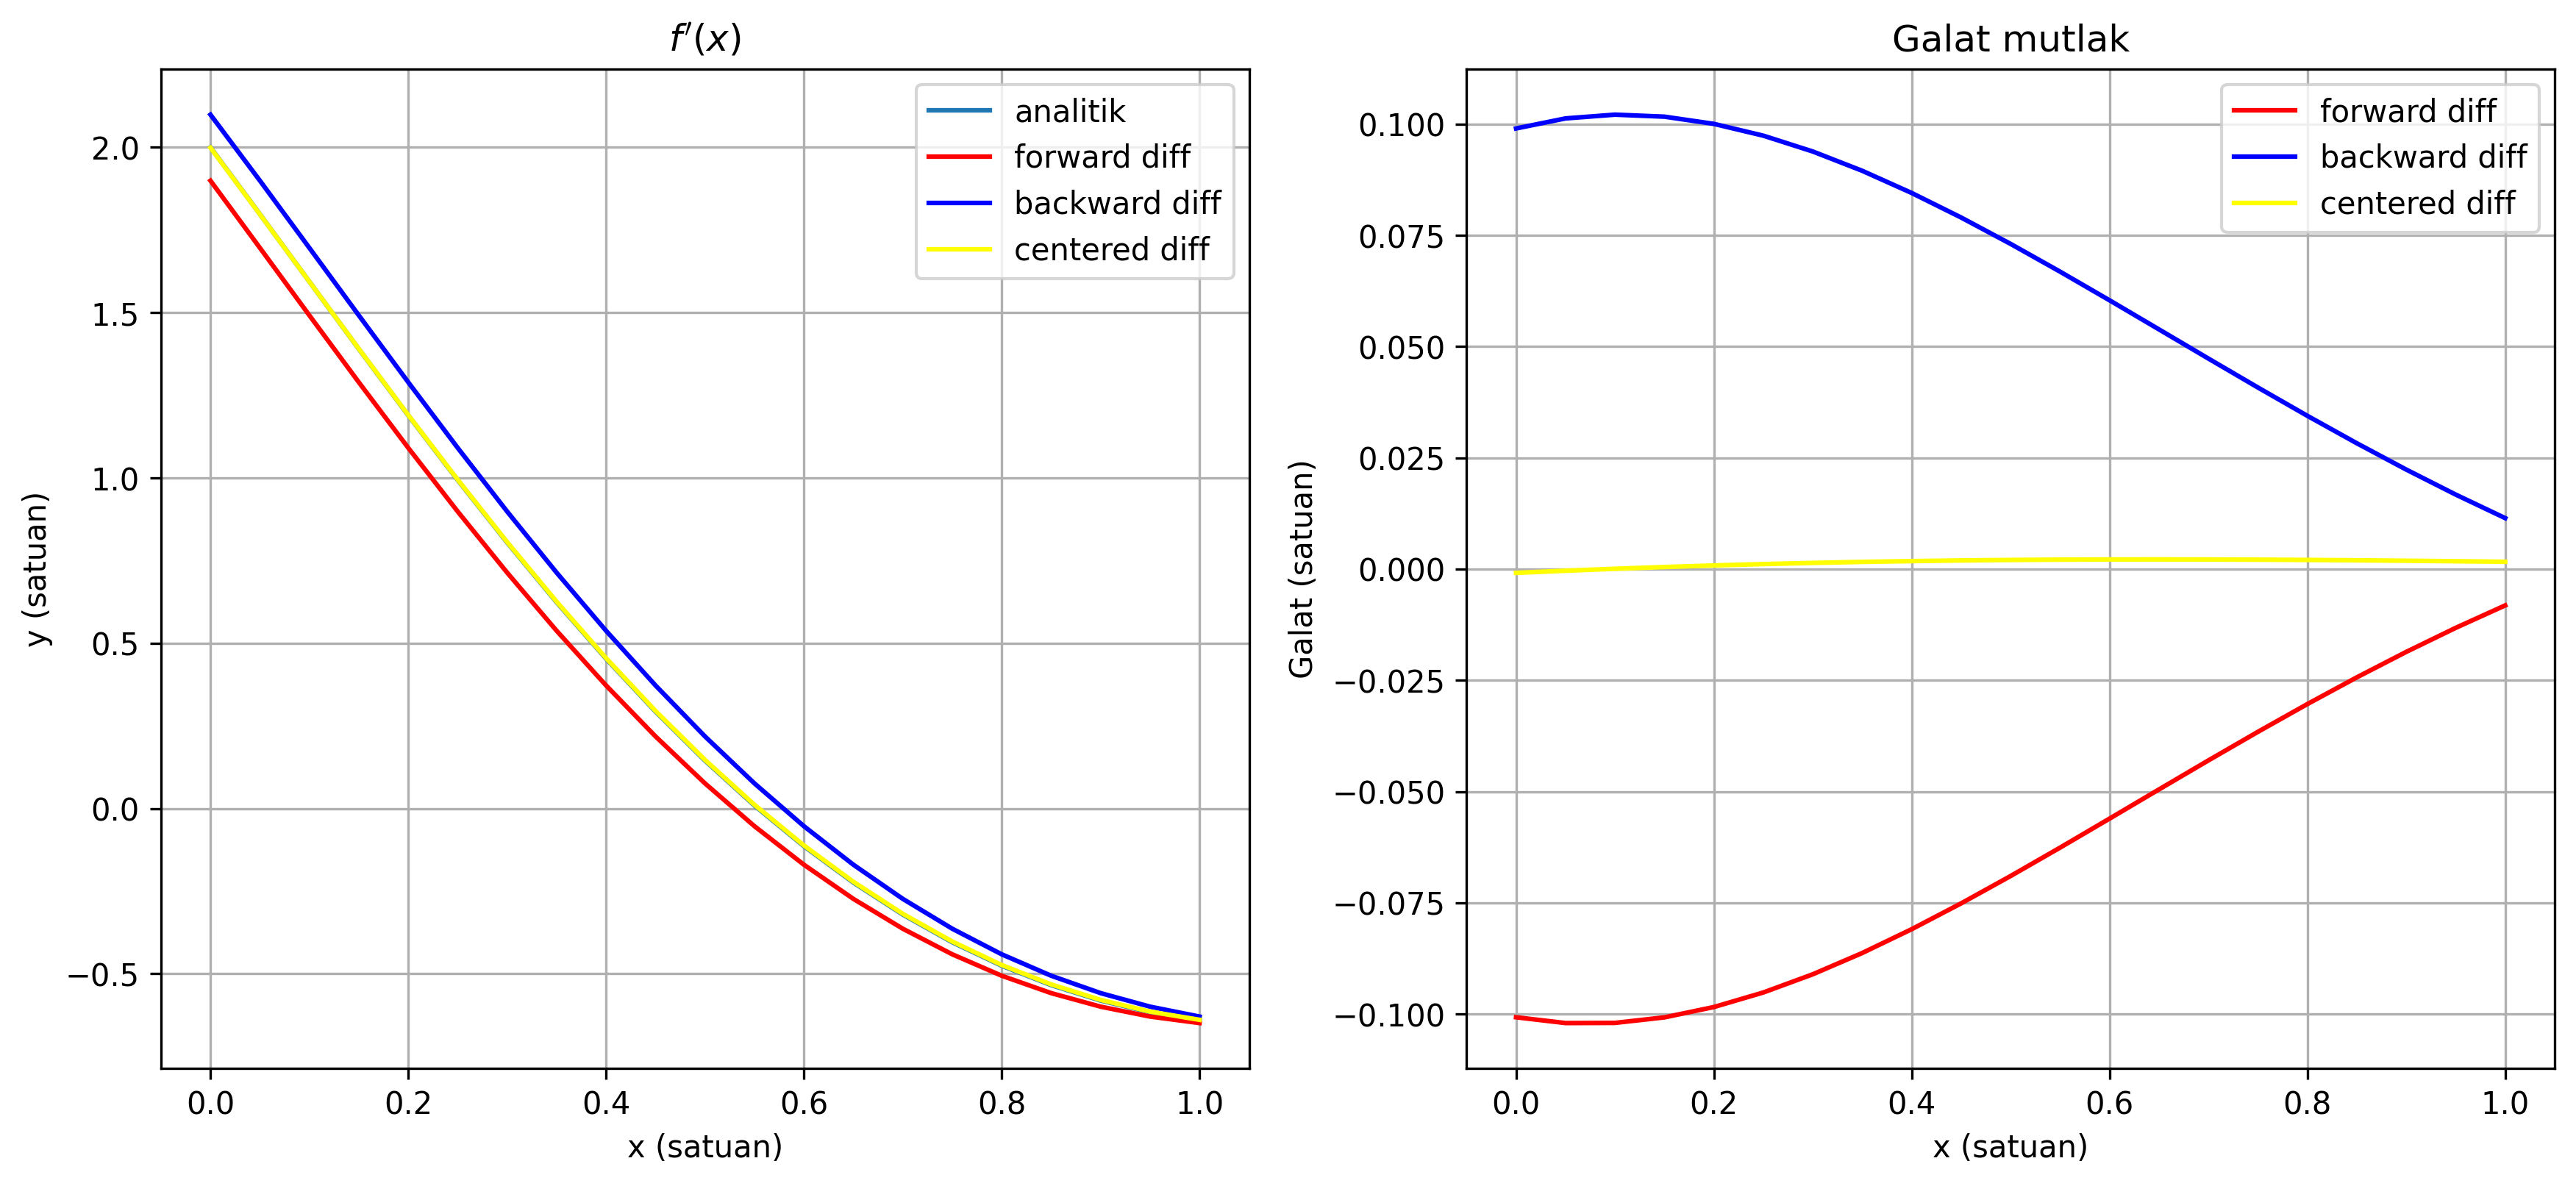

In [147]:
h = float(input("step-size = "))
x_min = float(input("x min = "))
x_max = float(input("x max = "))
x = np.arange(x_min, x_max+h, h)

# fungsi
y = g(x)

# turunan analitik
y0 = f_diff(x)

# turunan numerik
y1 = (g(x+h) - g(x))/h
y2 = (g(x) - g(x-h))/h
y3 = (g(x+h) - g(x-h))/(2*h)

# galat mutlak 
err1 = y1-y0
err2 = y2-y0
err3 = y3-y0

fig = plt.figure(dpi=300, figsize=(14,6))

ax1 = fig.add_subplot(121)
ax1.plot(x, y0, label="analitik")
ax1.plot(x, y1, color="red", label="forward diff")
ax1.plot(x, y2, color="blue", label="backward diff")
ax1.plot(x, y3, color="yellow", label="centered diff")
ax1.set_xlabel("x (satuan)")
ax1.set_ylabel("y (satuan)")
ax1.set_title("$f'(x)$")
ax1.grid()
ax1.legend()

ax2 = fig.add_subplot(122)
ax2.plot(x, err1, color="red", label="forward diff")
ax2.plot(x, err2, color="blue", label="backward diff")
ax2.plot(x, err3, color="yellow", label="centered diff")
ax2.set_xlabel("x (satuan)")
ax2.set_ylabel("Galat (satuan)")
ax2.set_title("Galat mutlak")
ax2.grid()
ax2.legend()

plt.show()

In [148]:
# formatting output
print("No. \t x \t f(x) \t\tf'(x) \t\t galat")
for i in range(len(y3)):
  x_val = x[i]
  y_val = y[i]
  diff_val = y3[i]     # y1=for diff, y2=back diff, y3=cen diff
  err_val = err3[i]    # err1=for diff, err2=back diff, err3=cen diff
  text = "{0:0d} \t {1:0.2f} \t {2:0.5f} \t{3:0.5f} \t {4:0.5f}".format(
      i, x_val, y_val, diff_val, err_val*100)
  print(text)        

No. 	 x 	 f(x) 		f'(x) 		 galat
0 	 0.00 	 1.00000 	1.99916 	 -0.08353
1 	 0.05 	 1.09496 	1.79763 	 -0.03556
2 	 0.10 	 1.17976 	1.59392 	 0.00828
3 	 0.15 	 1.25436 	1.39065 	 0.04784
4 	 0.20 	 1.31883 	1.19020 	 0.08307
5 	 0.25 	 1.37338 	0.99469 	 0.11396
6 	 0.30 	 1.41830 	0.80596 	 0.14056
7 	 0.35 	 1.45397 	0.62561 	 0.16295
8 	 0.40 	 1.48086 	0.45499 	 0.18128
9 	 0.45 	 1.49947 	0.29520 	 0.19571
10 	 0.50 	 1.51038 	0.14711 	 0.20644
11 	 0.55 	 1.51418 	0.01136 	 0.21370
12 	 0.60 	 1.51151 	-0.11160 	 0.21772
13 	 0.65 	 1.50302 	-0.22154 	 0.21878
14 	 0.70 	 1.48936 	-0.31838 	 0.21714
15 	 0.75 	 1.47118 	-0.40222 	 0.21307
16 	 0.80 	 1.44914 	-0.47331 	 0.20685
17 	 0.85 	 1.42385 	-0.53200 	 0.19878
18 	 0.90 	 1.39594 	-0.57879 	 0.18910
19 	 0.95 	 1.36597 	-0.61425 	 0.17810
20 	 1.00 	 1.33451 	-0.63904 	 0.16603
